<h1 align="center"  > Exercício 2 - Inteligência Computacional - Algoritmo Árvore de decisão</h1>
<h1 align="center"  > Autor: André Martins</h1>
<h1 align="center" style="color:#8100cc;" >Questão 2a: Calculando o atributo para a raiz de uma árvore de decisão no problema do conjuntos de dados Iris </h1> <br>
<br><br>
O conjunto de dados da íris tem quatro atributos:

1. comprimento da sépala
2. largura da sépala
3. comprimento da pétala 
4. largura da pétala
<br>
**Variável de destino:**
espécies (Iris-setosa, Iris-versicolor, Iris-virginica)

![](https://i.imgur.com/PQqYGaW.png)

# Importing modules

In [22]:
# Processamento de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sb

# Para rotulagem
from sklearn.preprocessing import LabelEncoder

# Para dividir o conjunto de dados para treinamento e teste
from sklearn.model_selection import train_test_split

# Pontuação de precisão
from sklearn.metrics import accuracy_score 


# Carregando conjunto de dados

In [34]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/andremartins7/IntComp/main/Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
iris_df = iris_df.drop(columns=['Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
# contagem de espécies
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Verificando valores ausentes

In [39]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualização

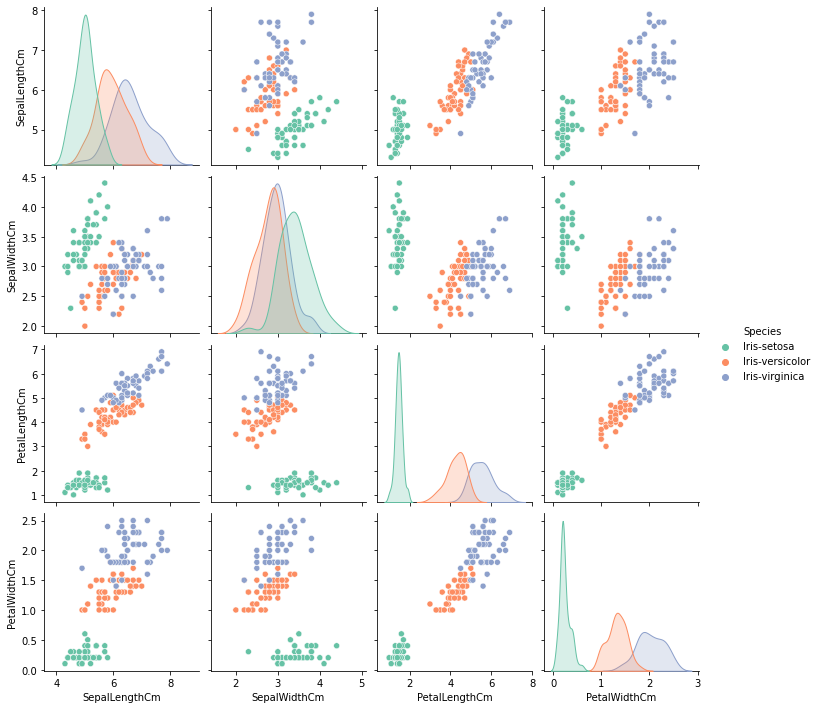

In [40]:
# Visualizando o relacionamento bivariado entre cada par de atributos
import seaborn as sns
sns.set_palette('Set2')

b = sns.pairplot(data = iris_df,hue="Species");
plt.show()

### Inferência
+ A relação entre pares de características de uma Iris-Setosa é distintamente diferente daquelas das outras duas espécies.
+ Há uma sobreposição nas relações de pares das outras duas espécies, Iris-Versicolor e Iris-Virginia.
+ Portanto, seria relativamente mais fácil classificar Iris-Setosa entre as três espécies. No entanto, a classificação de Iris-Versicolor e Iris-Virginica seria um pouco mais difícil.

# Marcação

In [41]:
label = LabelEncoder()
iris_df['Species'] = label.fit_transform(iris_df['Species'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Treinando o modelo

In [43]:

X = iris_df.drop(columns=['Species'])
Y = iris_df['Species']

# 70% do conjunto de dados será usado para treinamento e 30% restante será usado para teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)


In [45]:
# Aplicando algoritmo de árvore de decisão em nosso conjunto de dados

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model = model.fit(x_train, y_train)

In [47]:
print("Acurácia: ", model.score(x_test, y_test)*100)

Acurácia:  95.55555555555556


# visualização do gráfico da árvore de decisão

[Text(0.4, 0.9, 'PetalWidthCm <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [39, 32, 34]\nclass = Iris-setosa'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.7, 'PetalLengthCm <= 4.95\ngini = 0.5\nsamples = 66\nvalue = [0, 32, 34]\nclass = Iris-virginica'),
 Text(0.4, 0.5, 'PetalWidthCm <= 1.6\ngini = 0.157\nsamples = 35\nvalue = [0, 32, 3]\nclass = Iris-versicolor'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = Iris-versicolor'),
 Text(0.6, 0.3, 'SepalWidthCm <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]\nclass = Iris-virginica')]

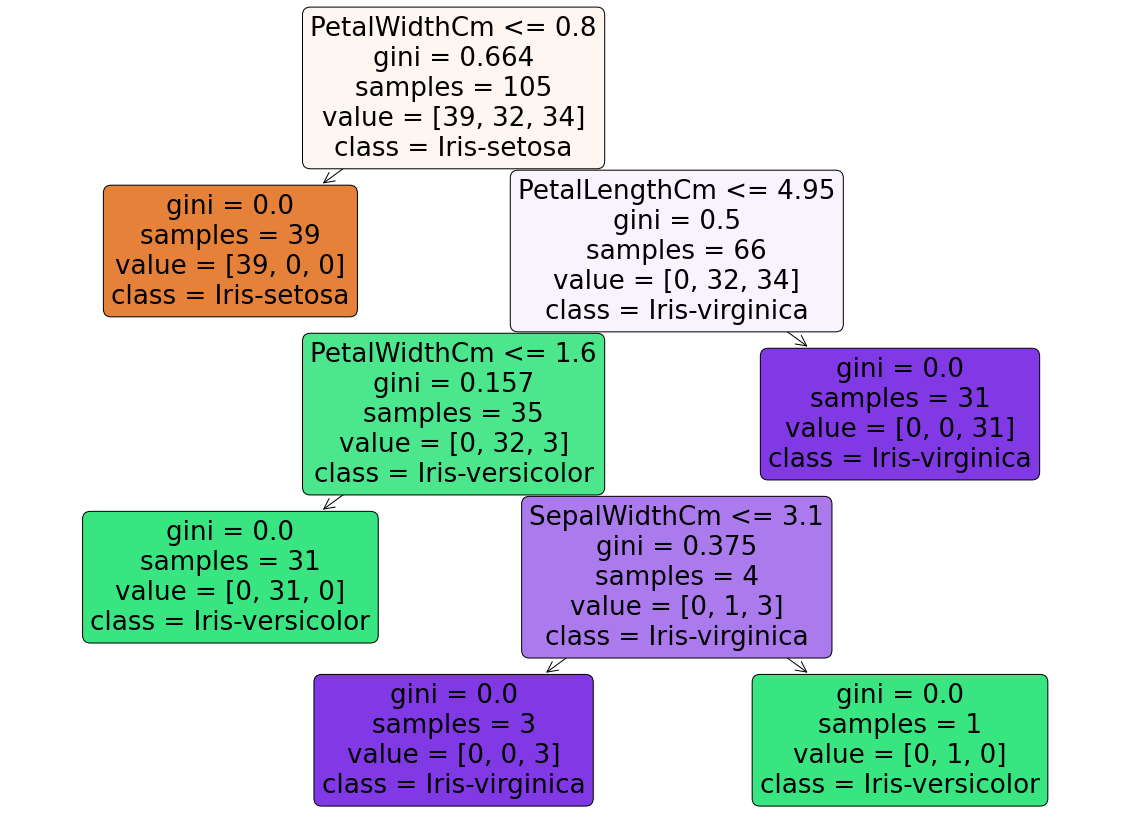

In [49]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model,
               feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
               class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
               filled = True,
              rounded = True)